<a href="https://colab.research.google.com/github/Ssendags/Food_Sales_Predictions/blob/main/Ssendagire_Denis_Project_1_food_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

**Project 1 Part 1:** Load the dataset

In [5]:
# There are 8523 rows and 12 columns. answer to question 1
filename = "/content/drive/MyDrive/Colab Notebooks/sales_predictions (1).csv"
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Project 1 Part 2:** Check for number of rows and columns of the dataset.

In [6]:
# There are 8523 rows and 12 columns. Qn 1
df.shape

(8523, 12)

In [7]:
# Below are the data types of each variable. answer to question 2
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# Check for duplicates, returns booloean
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [9]:
# Count the number of duplicated rows. No duplicated rows in this dataset. Answer to question 3
df.duplicated().sum()

0

In [10]:
# Check for incorrect data types. Data types seen to be okay compared to the data dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# Check for incosistencies in categorical values
# Found: Low Fat, LF and low fat which we assume are the same. Regular and reg are assumed to be the same
# Inconsistencies were found and corrected. Answer to question 7
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
# Standadise items in the Item Fat Content column.
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
# Check for incosisitencies in Item type, no inconsisitency found.
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
# Check for incosisitencies in Outlet Identifier, no inconsisitency found.
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [15]:
# Check for incosisitencies in Outlet Location Type, no inconsisitency found.
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [17]:
# Check for incosisitencies in Outlet type, no inconsisitency found.
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [18]:
# Check for missing values. There are missing values in Item Weight and Outlet Size columns. Answer to question 4
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# Derive missing values in Item Weight column based on values in Item Identifier column
# Since other similar values in the Item Identifier have the Item Weight values 
# Drop Item size column for missing values. Item Size is considered of low relevancy
# Above are answers to question 5
# There no missing values after deriving and dropping as above. Answer to question 6
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Identifier"].str[:2])
df.drop(columns="Outlet_Size", inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
# Obtain the summary statistics of the numerical columns. Answer to question 8
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [21]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

Import Libraries

In [22]:
import pandas as pd
# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Project 1 Part 3:**
Histogram to view the frequency distribution of food Item Type. The graph presents with overlapping x labels.

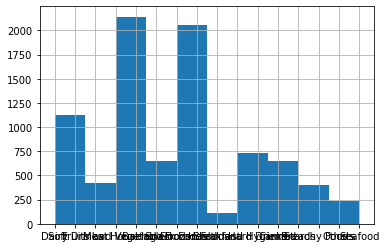

In [23]:
df["Item_Type"].hist()

Overlapping x labels are adressed by rotating them.
The data also needs spreading out for more clarity, this is achieved by using bins. Below is a better presentation of the frequency distribution of Item Type.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

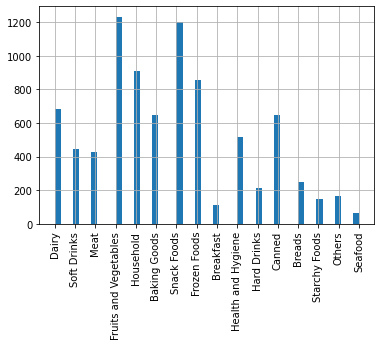

In [25]:
df['Item_Type'].hist(bins = 50)
plt.xticks(rotation = 90)
# plt.ticklabel_format(useOffset=False, style='plain')

Boxplot to view statstical summaries of various features in the dataset. The Item Outlet Sales were considered in relationship to to Outlet type.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


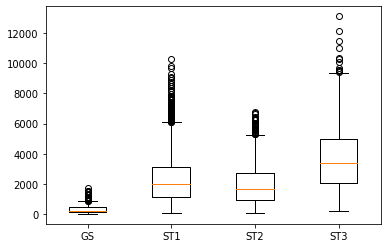

In [26]:
# Boxplot using matplotlib
grocery = df.loc[df["Outlet_Type"] == "Grocery Store","Item_Outlet_Sales"].values
supermarket1 = df.loc[df["Outlet_Type"] == "Supermarket Type1","Item_Outlet_Sales"].values
supermarket2 = df.loc[df["Outlet_Type"] == "Supermarket Type2","Item_Outlet_Sales"].values
supermarket3 = df.loc[df["Outlet_Type"] == "Supermarket Type3","Item_Outlet_Sales"].values
plt.boxplot([grocery,supermarket1,supermarket2,supermarket3], labels=["GS", "ST1", "ST2", "ST3"]);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


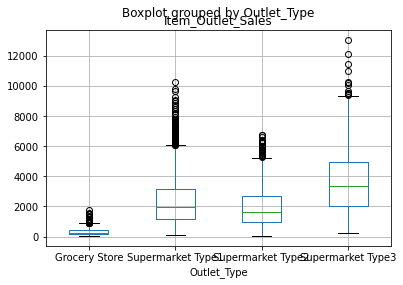

In [27]:
# Boxplot using pandas- (to be "beautified")
df.boxplot(column = "Item_Outlet_Sales", by = "Outlet_Type");

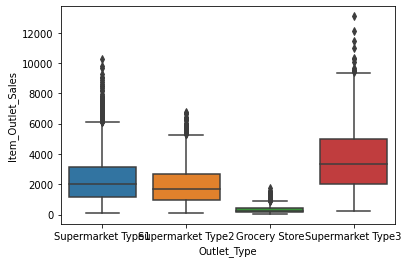

In [28]:
# Boxplot using seaborn
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)

Heatmap of the correlation between numerical features in the dataframe.

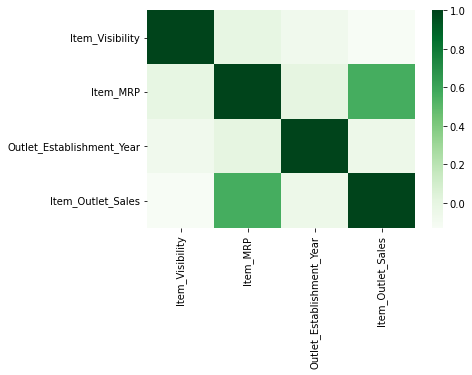

In [29]:
# After importing libraries and loading the data (df), the correllation coefficient can be checked as below:
corr =df.corr()
# A heat map is used to visualise the correlations, choosing the colours (cmap = "Colour")
sns.heatmap(corr, cmap = "Greens")

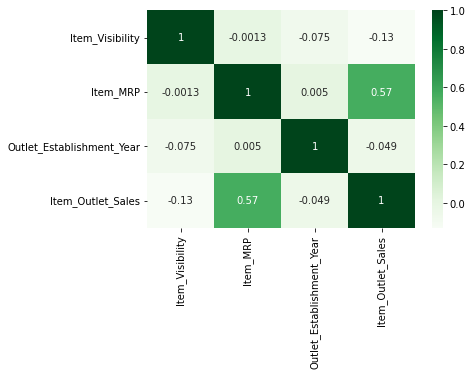

In [30]:
# Adding correlation coefficients to the heatmap. Moderate correlation (0.57) is observed between Item Outlet Sales and Item MRP (maximum retail price)
sns.heatmap(corr, cmap = "Greens", annot = True)

**Project 1 Part 4:**
Build on your previous cleaning, exploration, and analysis.  
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

Text(0.5, 1.0, 'Maximum Retail Prices vs Item Outlet Sales')

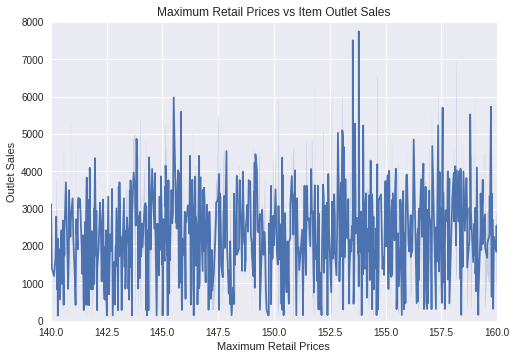

In [32]:
plt.style.use("seaborn")
max_retail_price = df["Item_MRP"]
outlet_sales = df["Item_Outlet_Sales"]
sns.lineplot(x = max_retail_price, y = outlet_sales)
plt.xlim(left=140,right=160)
plt.ylim(bottom=0,top=8000)
plt.xlabel('Maximum Retail Prices')
plt.ylabel('Outlet Sales')
plt.title('Maximum Retail Prices vs Item Outlet Sales')

From the above visualisation it is noticed that increase in Item Maximum Retail Price corresponds with increase in Item Outlet Sales, which is a positive correlation and this could further relate to outlet type, location type and outlet size.

Text(0.5, 1.0, 'Outlet Sale by Outlet Type')

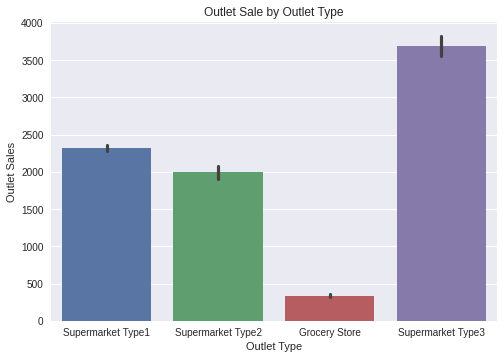

In [33]:
plt.style.use("seaborn")
outlet_type = df["Outlet_Type"]
outlet_sales = df["Item_Outlet_Sales"]
sns.barplot(x = outlet_type, y = outlet_sales)
plt.xlabel('Outlet Type')
plt.ylabel('Outlet Sales')
plt.title('Outlet Sale by Outlet Type')

The above visualisation indicates that sales are higher at Supermarket3 outlet type, with Supermarket2, supermarket1 and Grocery Store following in that order.

Text(0.5, 1.0, 'Outlet Sale by Outlet Location Type')

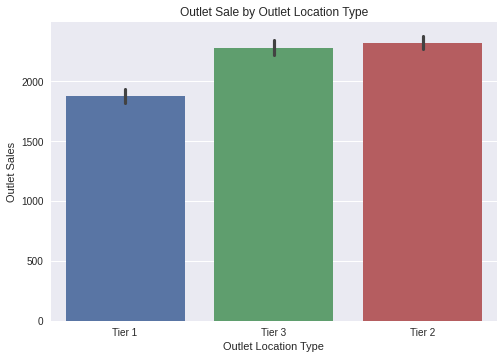

In [34]:
plt.style.use("seaborn")
outlet_location = df["Outlet_Location_Type"]
outlet_sales = df["Item_Outlet_Sales"]
sns.barplot(x = outlet_location, y = outlet_sales)
plt.xlabel('Outlet Location Type')
plt.ylabel('Outlet Sales')
plt.title('Outlet Sale by Outlet Location Type')

In [40]:
# Assigning Item_Outlet_Sales as target vector.
y = df["Item_Outlet_Sales"]
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [41]:
# Assigning the rest of the columns as features Matrix.
X = df.drop(columns="Item_Outlet_Sales")
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [45]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [46]:
# Select the categorical columns.
cat_selector = make_column_selector(dtype_include = "object")
cat_selector(X_train)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [47]:
# Select numerical columns
num_selector = make_column_selector(dtype_include = "float")
num_selector(X_train)

['Item_Visibility', 'Item_MRP']